# 🙌 Bruce Almighty: A Data Science Twist

This project was inspired by the movie *Bruce Almighty*.  
In one memorable scene, Bruce organizes all the prayers into a dataset.  
While watching, I thought to myself:  
*"If I were Bruce, I would build a Machine Learning model to handle those prayers."*  

So… why not try it out? ✨  

To bring this idea to life, I asked ChatGPT to generate a **synthetic dataset** similar to the one shown in the movie.  
ChatGPT added a few extra columns, which actually turned out to be helpful.  
Even if the dataset had been an exact replica of the movie, we would have eventually needed those extra columns for analysis and modeling anyway.  

This notebook is my playful take on the question:  
**“What if I were in Bruce’s shoes?”** 👞💡  

In [2]:
import pandas as pd

#Let's load our dataset
df = pd.read_csv(r"D:\PERSONAL PROJECTS\BRUCE ALMIGHTY\blessings_dataset_messy.csv")

#I made a mistake while asking ChatGPT to make a dataset for this purpose, and now, let's make all Grant_Status values as "waiting"
df["Grant_Status"] = "waiting"

#Now, let's make the changes and give this dataset a different name
df.to_csv("blessings_dataset_all_waiting.csv", index=False)

#Quick check
df.head()

,From,Subject,Urgency,Deserve_Score,Grant_Status
0,Michael Perrelli,Party Plans,high,8,waiting
1,Melissa Wayne,Respect From Students,medium,7.5,waiting
2,Gary Tatum,Finding An Apartment,HIGH,6,waiting
3,Boris Bodunov,Help With Homework,low,five,waiting
4,Alexander Linsky,Lost Dog,Low,NaN,waiting


In [3]:
#Let's save the new dataset to our target folder or local folder
output_path = r"D:\PERSONAL PROJECTS\BRUCE ALMIGHTY\blessings_dataset_all_waiting.csv"
df.to_csv(output_path, index=False)

print(f"✅ File saved successfully at: {output_path}")

✅ File saved successfully at: D:\PERSONAL PROJECTS\BRUCE ALMIGHTY\blessings_dataset_all_waiting.csv


Now that we have our dataset, let’s begin with some Exploratory Data Analysis (EDA).  
The goal here is to **understand our data before making any changes**.  

We will:  
- Look at the structure of the dataset (rows, columns, datatypes).  
- Identify missing values and inconsistencies.  
- Summarize categorical variables (e.g., urgency levels, grant status).  
- Get a feel for numerical variables (e.g., deserve scores).  
- Explore the "subjects" of prayers to see common themes.  

At this stage, we’re **not cleaning or transforming anything yet**. We're just letting the data tell us its story.

In [5]:
#Dataset Shape
"""Let’s start simple. We’ll check the shape of the dataset — i.e., the number of rows (prayers) and columns (features).
This helps us confirm that the data loaded correctly and gives us a sense of its size."""

df.shape

(20, 5)

(20, 5) says that our dataset has 20 rows (each row is one prayer request)
and 5 columns (each column is one feature describing that request).

In [9]:
#Dataset Info
"""Next, we use `.info()` to see:
- Column names
- Datatypes
- Number of non-null (non-missing) values

This gives us a quick overview of the data structure and hints at possible issues
(like numbers stored as text or missing values).
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   From           20 non-null     object
 1   Subject        20 non-null     object
 2   Urgency        19 non-null     object
 3   Deserve_Score  18 non-null     object
 4   Grant_Status   20 non-null     object
dtypes: object(5)
memory usage: 928.0+ bytes


Every column has a data type (Dtype), and in our dataset, it's all "object". Object datatype generally means that the data type is mixed. In our case, the data types could be a mix of string and int/float types.

In [10]:
#First Few Rows
"""Now, let’s peek at the first 5 rows with `.head()`.  
This shows us what the data actually looks like and helps us spot inconsistencies right away.
"""

df.head()

,From,Subject,Urgency,Deserve_Score,Grant_Status
0,Michael Perrelli,Party Plans,high,8,waiting
1,Melissa Wayne,Respect From Students,medium,7.5,waiting
2,Gary Tatum,Finding An Apartment,HIGH,6,waiting
3,Boris Bodunov,Help With Homework,low,five,waiting
4,Alexander Linsky,Lost Dog,Low,NaN,waiting


In [12]:
#Missing Values
"""Missing values are a common issue in real world data.  
We’ll count how many null values each column has, so we know what needs fixing later.
"""

df.isnull().sum()

From             0
Subject          0
Urgency          1
Deserve_Score    2
Grant_Status     0
dtype: int64

So, this output shows that the columns **`Urgency`** and **`Deserve_Score`** have 1 and 2 missing (null) values, respectively.

Our dataset is quite small, with only **20 rows** and **5 columns**.
In real-world scenarios, however, datasets often contain **hundreds of thousands of rows** and **dozens of columns**.
That means the number of missing values could be in the **thousands or even millions**, not just 1 or 2.

The code we used above gives us a quick way to see how many missing values we need to handle.

The next step is to think about **why** the values are missing and decide how to handle them:
- Can we safely ignore them?
- Do we need to fill them in (imputation)?
- Or can we drop those rows/columns entirely?

In [13]:
#Unique Values
"""For categorical columns (like `Urgency` or `Grant_Status`), it’s useful to see how many unique values exist.
This helps us spot inconsistent entries (like `high`, `HIGH`, `High`) that we’ll need to clean.
"""

df.nunique()

From             20
Subject          20
Urgency          11
Deserve_Score    15
Grant_Status      1
dtype: int64

#### Descriptive Statistics
We’ll use `.describe()` to get summary statistics for numeric columns.
This shows the count, mean, min, max, and percentiles.

⚠️ Note: since our dataset is messy, some numeric values are stored as text.
So `.describe()` may not show `Deserve_Score` correctly yet — but this is useful to confirm what needs fixing.

In [14]:
df.describe()

,From,Subject,Urgency,Deserve_Score,Grant_Status
count,20,20,19,18,20
unique,20,20,11,15,1
top,Michael Perrelli,Party Plans,medium,8,waiting
freq,1,1,4,2,20


Since most of our columns are stored as **object type**, the `.describe()` output shows summary stats for categorical data:

- **count** → Number of non-null (non-missing) entries in each column.  
  - Example: `Urgency` has 19 non-null values (1 missing).  
  - `Deserve_Score` has 18 non-null values (2 missing).

- **unique** → Number of distinct values in the column.  
  - Example: `Urgency` has 11 unique values (because of inconsistent entries like `high`, `HIGH`, `urgent`, etc.).  
  - `Deserve_Score` has 15 unique values (numbers, words like `"five"`, `"six"`, `"ten"`, etc.).

- **top** → The most frequently occurring value (the mode).  
  - Example: For `Urgency`, the most common value is `"medium"`.  
  - For `Deserve_Score`, the most common value is `"8"`.  
  - For `Grant_Status`, everything is `"waiting"` (since we set them all to waiting).

- **freq** → The frequency of that top value.  
  - Example: `"medium"` urgency appears 4 times.  
  - `"8"` as a deserve score appears 2 times.  
  - `"waiting"` appears 20 times.

---

👉 Key Takeaway:  
This confirms what we suspected earlier — our dataset is **messy**.  
- `Urgency` and `Deserve_Score` need cleaning and standardization.  
- `Grant_Status` has no variety right now (all waiting), which is fine since we’ll let the ML model decide later.

In [16]:
#Category Distributions
"""For categorical columns, we can use `.value_counts()` to see how many times each category appears.  
This helps us spot inconsistencies (like `high`, `HIGH`, `High`) that we’ll clean later."""

#Urgency distribution
df["Urgency"].value_counts(dropna=False)

medium      4
high        3
low         3
urgent      2
HIGH        1
Low         1
2           1
NaN         1
CRITICAL    1
3           1
LOW         1
High        1
Name: Urgency, dtype: int64

Here’s what we observe from the `Urgency` column:
- **Inconsistent casing**:  
  - `"high"`, `"HIGH"`, `"High"` → all mean the same thing.  
  - `"low"`, `"Low"`, `"LOW"` → also the same.  
- **Synonyms / Alternatives**:  
  - `"urgent"` is basically the same as `"high"` or `"critical"`.  
  - `"CRITICAL"` might be treated as an even stronger form of `"high"`.  
- **Numeric entries**:  
  - `2` and `3` appear, which don’t fit with the text values.  
  - These may have been intended as urgency levels on a numeric scale (e.g., 1 = low, 2 = medium, 3 = high).  
- **Missing values**:  
  - There is **1 NaN** entry that we’ll have to deal with.  
---
👉 **Key Takeaway**:  
The `Urgency` column is a good example of real-world messy categorical data.  
We’ll need to:  
- Normalize casing (e.g., all lowercase).  
- Map synonyms and numbers to consistent categories (`low`, `medium`, `high`, `critical`).  
- Handle the missing value (drop or impute).

In [17]:
#Grant_Status distribution
df["Grant_Status"].value_counts(dropna=False)

waiting    20
Name: Grant_Status, dtype: int64

As expected, every request currently has the status **`waiting`**.  
This is because we deliberately set all `Grant_Status` values to `"waiting"` when creating the dataset.  

In the original messy dataset, we had a mix of `"grant"`, `"reject"`, `"waiting"` (with inconsistent casing).  
But now, everything is standardized to `"waiting"`.

---

👉 **Key Takeaway**:  
At this stage, `Grant_Status` doesn’t provide any variation.  
Later, once we clean and score the data, this column will be useful as the **target variable** (what the ML model will try to predict).

In [18]:
#Deserve_Score distribution
df["Deserve_Score"].value_counts(dropna=False)

8       2
NaN     2
9       2
7       2
7.5     1
6       1
five    1
8.5     1
ten     1
3       1
4.5     1
six     1
two     1
one     1
5       1
4       1
Name: Deserve_Score, dtype: int64

The `Deserve_Score` column is supposed to represent a numeric score (e.g., 0–10), but the values are very inconsistent:

- **Numeric values stored as numbers**: `6`, `7`, `9`, `7.5`, `8.5`, `4.5`
- **Numbers stored as strings**: `"8"`, `"7"`, `"3"`, `"5"`, `"4"`
- **Numbers written as words**: `"five"`, `"six"`, `"ten"`, `"two"`, `"one"`
- **Missing values**: 2 entries are `NaN`

---

👉 **Key Takeaways:**
1. This column has a **datatype issue** (numbers mixed with text).
2. We’ll need to **standardize everything into numeric form** during cleaning:
   - Convert text numbers (e.g., `"five" → 5`)
   - Convert numeric strings (e.g., `"8" → 8`)
   - Keep decimals (e.g., `7.5`, `8.5`, `4.5`)
3. Handle missing values (decide whether to impute or drop them).

Once cleaned, this column will be a useful **numerical feature** for our ML model.

In [20]:
#Subject Distribution

"""First, let’s check `.value_counts()` for the `Subject` column.  
Since our dataset is small (20 rows) and each subject is unique, we expect to see each prayer appear exactly once.  

In a larger dataset, this would tell us the most common prayer topics."""

df["Subject"].value_counts()

Party Plans                    1
Respect From Students          1
World Peace                    1
Pass Exams                     1
Vacation in Hawaii             1
Win Lottery                    1
Grows Tomatoes                 1
Making The Cut                 1
Killing In The Stock Market    1
Mother's Health                1
Paying Off Debit               1
Don't Want To Be Lonely        1
Sell Old Car                   1
New Kitten                     1
Sister's Piano Lessons         1
Bless Grandma                  1
Lost Dog                       1
Help With Homework             1
Finding An Apartment           1
Get Taller                     1
Name: Subject, dtype: int64

As expected, every `Subject` in our dataset appears exactly once.  
This is because we only have **20 rows**, and each prayer/request was written as a unique phrase.  

In larger, real-world datasets, we would expect repetition (e.g., many people praying for "Health", "Success", "Peace").  
That would make `.value_counts()` useful to find the **most common requests**.  

---

👉 **Key Takeaway**:  
For our small dataset, `.value_counts()` doesn’t reveal much beyond confirming uniqueness.  
To get more insights, we’ll need to break subjects down into **words** and analyze **word frequencies** or even make a **word cloud** to spot recurring themes.

In [21]:
#Word Frequency in Subjects

"""Looking at unique subjects alone isn’t very informative here (since each request is different).  
Instead, let’s analyze the words used across all subjects.  

This will help us see the most common themes in the requests (e.g., "pray", "help", "health", "win")."""

from collections import Counter

#Split all subjects into words
words = " ".join(df["Subject"].astype(str)).lower().split()

#Count word frequencies
word_counts = Counter(words)

#Show the 10 most common words
word_counts.most_common(10)

[('in', 2),
 ('the', 2),
 ('party', 1),
 ('plans', 1),
 ('respect', 1),
 ('from', 1),
 ('students', 1),
 ('finding', 1),
 ('an', 1),
 ('apartment', 1)]

Here, we broke down all the `Subject` entries into words and counting their frequencies. By doing this,  
we can see which words appear most often across different requests:

- **"in"** → 2 times  
- **"the"** → 2 times  
- Most other words appear only once (`party`, `plans`, `respect`, `students`, `apartment`, etc.)

---

👉 **Key Takeaway**:  
Right now, the most frequent words are just **common stopwords** (`in`, `the`).  
This isn’t very meaningful.  

For better insights, we will:  
1. Remove common stopwords (like "in", "the", "an", "with").  
2. Focus on more meaningful words like `health`, `peace`, `lottery`, `grandma`.  
3. Optionally, create a **word cloud** to visualize prayer themes.

This way, we can extract actual **topics of interest** from the requests rather than filler words.

In [24]:
#Word Frequency (without Stopwords)

"""The previous word frequency analysis was dominated by **stopwords** (like "the", "in", "an"),  
which don’t tell us much about the actual themes of the requests.  

Now we’ll remove common stopwords and re-run the analysis.  
This should highlight more meaningful words such as "health", "peace", "lottery", "dog", etc.
"""

from collections import Counter
import re

# Define a simple list of stopwords
stopwords = {"the", "in", "an", "a", "with", "to", "of", "for", "on", "and"}

# Combine all subjects into one string, lowercase, and split into words
words = re.findall(r"\b\w+\b", " ".join(df["Subject"]).lower())

# Remove stopwords
filtered_words = [word for word in words if word not in stopwords]

# Count word frequencies
word_counts = Counter(filtered_words)

# Show top 10 most common words
word_counts.most_common(10)

[('s', 2),
 ('party', 1),
 ('plans', 1),
 ('respect', 1),
 ('from', 1),
 ('students', 1),
 ('finding', 1),
 ('apartment', 1),
 ('help', 1),
 ('homework', 1)]

Here, we removed some stopwords (common filler words in a language that usually don’t add much meaning in text analysis). After removing them, the word frequency analysis looks much more meaningful:  

- We now see real **themes of requests** (`party`, `plans`, `respect`, `apartment`, `help`, `homework`).  
- This highlights the variety of prayers: some personal (party, apartment), some academic (respect, homework).  
- The token **"s"** shows up because of apostrophes (e.g., `"Mother's"`, `"Don't"`).  
  - We’ll fix this later by improving the text cleaning step (removing stray `'s`).  

---

👉 **Key Takeaway**:  
This step confirms that even with short subjects, we can start to extract **meaningful words** that reveal the themes of prayers.  
Later, we could build categories like **Health, Wealth, Education, Relationships, Fun** from these words.

In [25]:
#Word Frequency with Stopword Removal + Apostrophe Fix

"""To make our word frequency analysis cleaner:
- We’ll use a **standard stopword list** from `nltk` (includes many common filler words like *the, in, an, on*).
- We’ll also clean apostrophes, so words like `"Mother's"` become `"mother"` and `"don't"` becomes `"dont"`.

This ensures we keep only the **meaningful words** that reflect the themes of the prayers."""

from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

#Download stopwords list (run once)
nltk.download("stopwords")

#Use English stopwords from NLTK
stop_words = set(stopwords.words("english"))

#Clean text: lowercase, remove apostrophes, tokenize
cleaned_subjects = re.sub(r"[’']", "", " ".join(df["Subject"]).lower())

#Tokenize words
words = re.findall(r"\b\w+\b", cleaned_subjects)

#Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

#Count word frequencies
word_counts = Counter(filtered_words)

#Show top 10 words
word_counts.most_common(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[('party', 1),
 ('plans', 1),
 ('respect', 1),
 ('students', 1),
 ('finding', 1),
 ('apartment', 1),
 ('help', 1),
 ('homework', 1),
 ('lost', 1),
 ('dog', 1)]

Now the results make sense — we can actually see the **themes of the prayers**:

- **Party / Plans** → social or lifestyle requests  
- **Respect / Students / Homework** → academic and career-oriented prayers  
- **Finding / Apartment** → housing and stability  
- **Lost / Dog** → emotional and family-related requests  

---

👉 **Key Takeaway**:  
By removing stopwords and cleaning apostrophes, we uncovered meaningful words that highlight the *types of blessings people are asking for*.  

This is the first step towards grouping these requests into **categories** like *Health, Education, Relationships, Finances, Fun, etc.* for later ML modeling.

## 👁️👁️ Visualization

This is also a part of EDA.
Visualizations help us **see patterns, spot outliers, and understand the data distribution** in a way that raw numbers alone cannot.

* 📊 **Histograms** are useful for understanding numeric distributions
* 📈 **Bar charts** are best for categorical data
* ☁️ **Word clouds** help us quickly see the most common words or themes in text data

By combining statistical summaries with visualizations, we can tell a more complete story about our dataset and identify where **data cleaning** will be needed before moving on to feature engineering and modeling.

In [28]:
#Word Cloud of Prayer Subjects

"""Let's have some fun here. :)

To get a more visual feel for the requests, let’s generate a **Word Cloud** from the cleaned subjects.  
The larger a word appears, the more frequently it shows up across the dataset.  

This gives us an intuitive overview of the most common themes."""

!pip install wordcloud

     -------------------------------------- 300.4/300.4 kB 4.6 MB/s eta 0:00:00


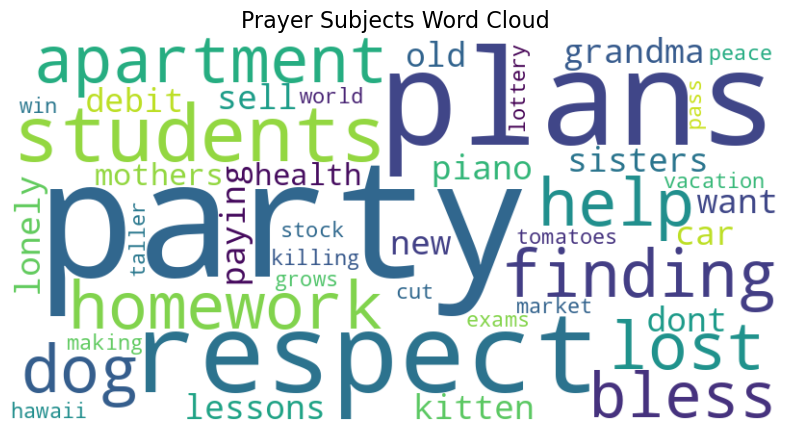

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Generate a word cloud from our filtered words
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))

#Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Prayer Subjects Word Cloud", fontsize=16)
plt.show()

The Word Cloud gives us a **visual overview** of the prayer subjects.  
- Larger words = more frequent requests.  
- Even though our dataset is small (20 rows), we can already see clear themes:  
  - 🎉 Social requests → *party, plans*  
  - 🎓 Academic → *respect, students, homework*  
  - 🏠 Housing → *apartment, finding*  
  - 🐶 Family & pets → *lost, dog, grandma, bless*  
  - 💰 Finances → *debit, paying, lottery*  

---

👉 **Key Takeaway**:  
Word Clouds are a quick and intuitive way to spot **common topics** in text data.  
With a larger dataset, this would immediately highlight the **top categories of prayers** (e.g., *health*, *success*, *peace*). 

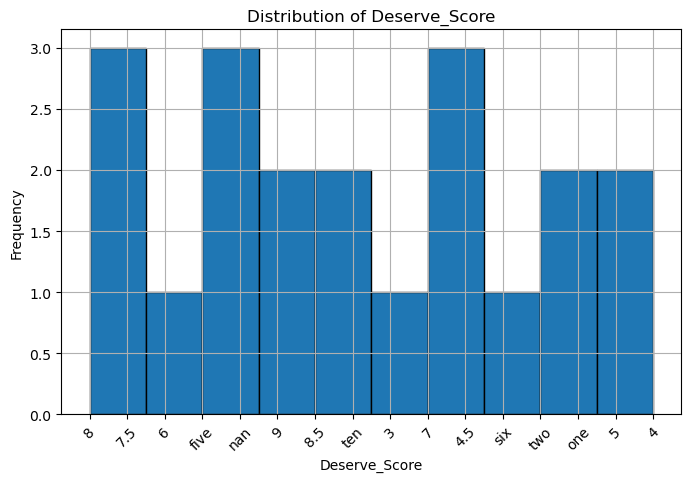

In [30]:
#Distribution of Deserve_Score

"""Now let’s explore the distribution of the `Deserve_Score` column.  
Since this column represents the "karma score" of each prayer request, it’s important to see:  
- How the scores are spread out (low vs high).  
- Whether there are unusual values (like text entries: "five", "ten").  
- If the distribution looks balanced or skewed.

A histogram will help us visualize this."""

import matplotlib.pyplot as plt

# Plot histogram of Deserve_Score
plt.figure(figsize=(8,5))
df["Deserve_Score"].astype(str).hist(bins=10, edgecolor="black")

plt.title("Distribution of Deserve_Score")
plt.xlabel("Deserve_Score")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

The histogram shows that our `Deserve_Score` column is messy and contains a mix of formats:

- ✅ Some values are numeric (`8`, `7.5`, `9`).  
- 📝 Some are written as words (`five`, `ten`, `six`, `two`, `one`).  
- ⚠️ There are also missing values (`NaN`).  

Because of this, the histogram is treating them more like categories instead of a smooth numeric distribution.  
This tells us that during the **data cleaning phase**, we will need to:  
1. Convert all text-based numbers into proper numeric form.  
2. Handle the missing values (either by dropping or imputing).  
3. Re-plot a clean histogram to see the actual distribution.  

For now, the key takeaway is: **our dataset has inconsistencies in data types that we’ll need to fix before modeling.**

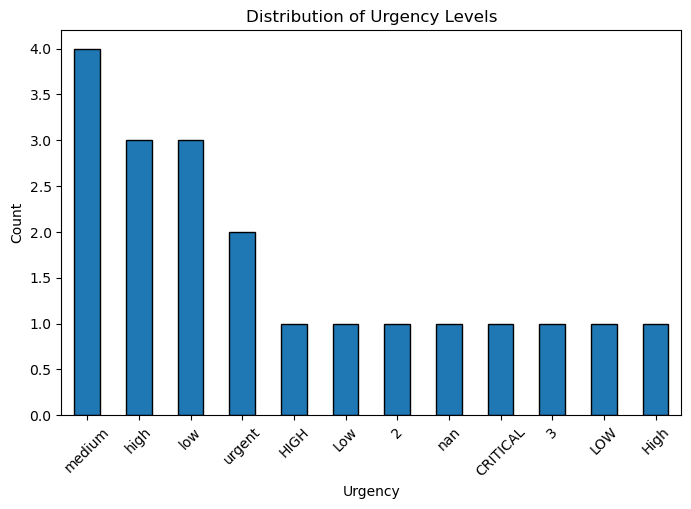

In [31]:
#Distribution of Urgency

"""The `Urgency` column represents how urgent each prayer request is.  
When we checked earlier with `.value_counts()`, we noticed a lot of inconsistencies:  

- Variations in spelling and capitalization (`high`, `High`, `HIGH`).  
- Unexpected categories (`2`, `3`).  
- Extra labels like `urgent`, `CRITICAL`.  
- A missing value (`NaN`).  

Visualizing this with a bar plot will help us clearly see how messy the categories are
and confirm that this column will need cleaning.
"""

#Bar plot for Urgency distribution
plt.figure(figsize=(8,5))
df["Urgency"].value_counts(dropna=False).plot(kind="bar", edgecolor="black")

plt.title("Distribution of Urgency Levels")
plt.xlabel("Urgency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The bar chart confirms that our `Urgency` column is inconsistent and messy:

- ✅ Common categories like `medium`, `high`, `low`, and `urgent` appear.  
- 🔁 Duplicates with different cases (`high`, `High`, `HIGH`, `Low`, `LOW`).  
- ⚠️ Unexpected values (`2`, `3`, `CRITICAL`).  
- 🕳️ There is also a missing value (`NaN`).  

This means we’ll need to **standardize the categories** (e.g., merge all variations of "high" into one) and decide how to handle unusual entries like numbers or `CRITICAL`.  

For now, the key takeaway is: **Urgency levels are not standardized, and cleaning is necessary before modeling.**

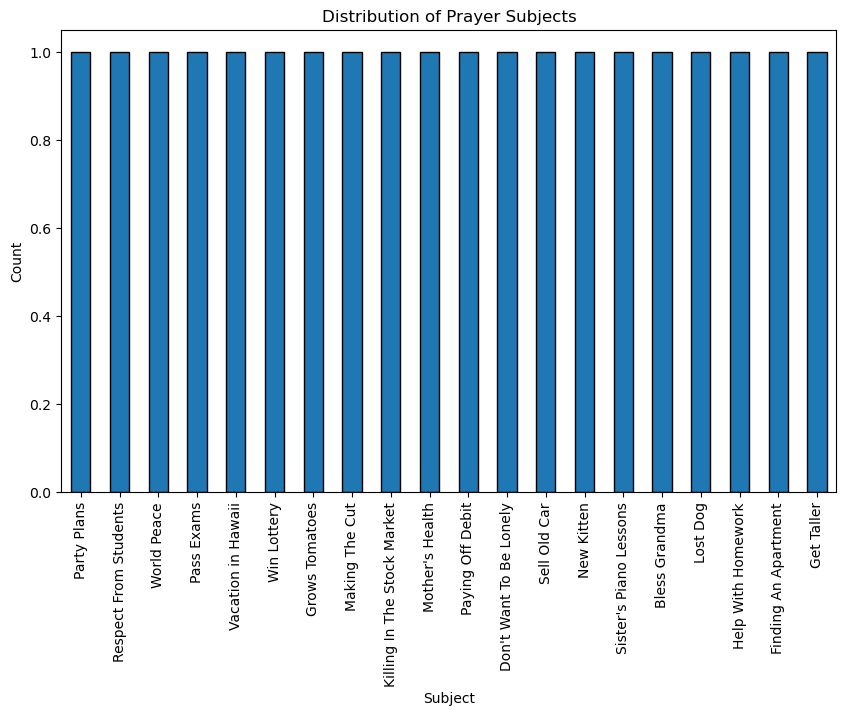

In [33]:
#Distribution of Prayer Subjects

"""The `Subject` column contains the actual prayer requests (e.g., "Party Plans", "Help With Homework").  
When we checked earlier, each subject appeared only once, meaning this column is highly diverse.  

To visualize this, we can plot a bar chart of the subjects.  
Although most values are unique, the visualization gives us:

- 📌 An overview of the types of requests.  
- 🎯 A sense of how varied the dataset is.  
- 🚩 Confirmation that text preprocessing (like grouping similar themes: "health", "money", "relationships")
will be important in later steps."""

#Plot bar chart of subjects
plt.figure(figsize=(10,6))
df["Subject"].value_counts().plot(kind="bar", edgecolor="black")

plt.title("Distribution of Prayer Subjects")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

The bar chart shows that each prayer subject is **unique** — every request appears only once.  
This means the `Subject` column is highly diverse, and there are no repeating categories at this stage.  

🔎 Key takeaways:
- This column is essentially **free-text data** (unstructured).  
- We’ll need to **group or categorize similar themes** (e.g., "Mother’s Health" and "Bless Grandma" → *Health-related*, "Win Lottery" and "Paying Off Debt" → *Financial*).  
- Until then, visualizations like this won’t reveal much pattern beyond confirming uniqueness.

To better capture themes and repeated words, a **word cloud** or NLP preprocessing will be more informative than a raw bar chart.

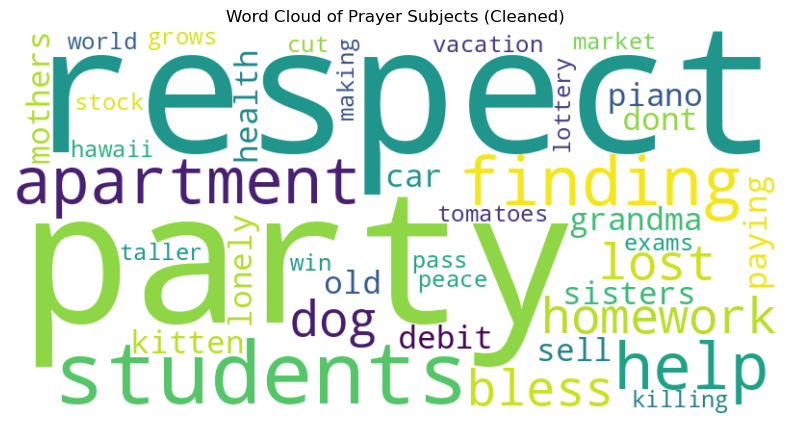

In [35]:
#Let's make a Cleaner WordCloud now
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import string

#Prepare the text from Subject column
subject_text = " ".join(str(s).lower() for s in df["Subject"].dropna())

#Remove punctuation
subject_text = subject_text.translate(str.maketrans("", "", string.punctuation))

#Add custom stopwords if needed (like 'lesson', 'new', 'want')
stopwords = set(STOPWORDS)
stopwords.update(["lessons", "new", "want", "plans"])  

#Generate word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color="white",
                      stopwords=stopwords,
                      colormap="viridis").generate(subject_text)

#Plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Prayer Subjects (Cleaned)")
plt.show()

---

## 📝 EDA Summary

Here’s what we learned from exploring the raw dataset:

### Dataset Structure
- **20 rows × 5 columns**  
- Columns: `From`, `Subject`, `Urgency`, `Deserve_Score`, `Grant_Status`

### Missing Values
- `Urgency` → 1 missing value  
- `Deserve_Score` → 2 missing values  
- Others → no missing values

### Categorical Columns
- **Urgency**: 11 unique values, but very inconsistent (`high`, `HIGH`, `High`, `urgent`, numbers `2`, `3`, etc.).  
- **Grant_Status**: all set to `"waiting"` for now (clean, but no variation yet).  
- **From** & **Subject**: all unique, no duplicates.

### Numeric Column
- **Deserve_Score**: inconsistent datatypes:  
  - Numbers as integers/floats (`6`, `7.5`, `8.5`)  
  - Numbers as strings (`"8"`, `"3"`, `"7"`)  
  - Numbers as words (`"five"`, `"ten"`, `"one"`)  
  - 2 missing values

### Text Analysis
- `.value_counts()` for `Subject` → every request is unique in this small dataset.  
- Word Frequency (after cleaning stopwords and apostrophes) revealed themes:  
  - 🎉 Social: *party, plans*  
  - 🎓 Academic: *respect, students, homework*  
  - 🏠 Housing: *apartment, finding*  
  - 🐶 Family & Pets: *lost, dog, grandma, bless*  
  - 💰 Finances: *debit, paying, lottery*  
- Word Cloud visualization made these themes easy to spot at a glance.

---

### ✅ Key Takeaway
Our dataset is **messy but rich in themes**:  
- Categorical columns need normalization.  
- Numerical column needs datatype fixing.  
- Text column reveals clear prayer categories, even from short subjects.  

We now have a solid understanding of the dataset’s story.  
Next step → **Data Cleaning** to fix missing values, standardize categories, and prepare features for modeling.